In [2]:
# Код нейронной сети в Keras!
###############################
import numpy as np
#import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [3]:
# графики
import matplotlib.pyplot as plt

# подключение датасета
from keras.datasets import fashion_mnist

In [3]:
# метрики
# tf.keras.metrics.Precision 
# tf.keras.metrics.Recall

In [4]:
# загрузка датасета
(train_imagef,train_labelf),(test_imagef,test_labelf)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
# просмотр части датасета
# plt.imshow(train_imagef[100,:,:])
# plt.show()

In [6]:
# приведем изображение к диапазону (-1,1).
train_images = (train_imagef / 127) - 1
test_images = (test_imagef / 127) - 1

print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [7]:
# делаем векторизацию, т.к. наши слои полносвязные и хотят на вход вектор.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape, test_images.shape)

(60000, 784) (10000, 784)


In [8]:
# создаем модель model

def model_creation(train_images, train_labelf, test_images, test_labelf,
                   layers_number=2, epochs=15, neurons_enter_number=128, optimizers=['SGD','RMSProp','adam','NAdam'], activators=['relu', 'tanh', 'softmax'], model_name='just_model',
                   loss_name='categorical_crossentropy', metrics_names=['accuracy']):
  
  results_test_list = []
  results_train_list = []
  optim_list = []
  hyper_params_list = [layers_number, epochs, neurons_enter_number, activators, loss_name, metrics_names]

  model = Sequential(name=model_name)
  # входной слой + поносвязный слой из neurons_enter_number нейронов
  if layers_number >= 2:
    neurons_enter_number = 128
  model.add(Dense(neurons_enter_number, activation=activators[0], input_shape=(784,)))  
  # Скрытый слой k из 10+(10-k)*10 нейронов
  for k in range(layers_number-1):
      model.add(Dense(10+(10-k)*10, activation=activators[1])) 
  # выходной слой из 10 нейронов (сколько классов, столько нейронов)
  model.add(Dense(10, activation=activators[2]))
  
  # сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
  model.save_weights('model.h5')
  
  plt.figure(figsize=(16,7))
  
  # вектор для выводв результатов
  epoch = np.arange(epochs+1)

  # будем изменять оптимизаторы
  #opt_list = [keras.optimizers.SGD( ),keras.optimizers.Adam( ),keras.optimizers.Nadam( )]
  for i_optim in optimizers:
    # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
    modeli = Sequential(name=model_name)
    # входной слой + поносвязный слой из 128 нейронов
    modeli.add(Dense( 128, activation=activators[0], input_shape=(784,)))  
    # Скрытый слой k из 10+(10-k)*10 нейронов (если число слоёв > 2)
    for k in range(layers_number-1):
        modeli.add(Dense(  10+(10-k)*10, activation=activators[1])) 
    # выходной слой из 10 нейронов (сколько классов, столько нейронов)
    modeli.add(Dense(10, activation=activators[2]))
  
    # загружаем веса modeli.load_weights('model.h5')
    modeli.load_weights('model.h5')
    # компилируем modeli с одним из оптимизаторов
    modeli.compile(
        optimizer=i_optim,
        loss=loss_name,
        metrics=metrics_names,
        )
    
    # вычисляем ошибку для modeli без обучения
    hh0_tr = modeli.evaluate(train_images[:48000,:], to_categorical(train_labelf[:48000]),verbose = 0)
    hh0_val = modeli.evaluate(train_images[48000:,:], to_categorical(train_labelf[48000:]),verbose = 0)
    # проводим обучение модели 
    hh = modeli.fit(
                    train_images,
                    to_categorical(train_labelf),
                    epochs=epochs,
                    batch_size=32, validation_split=0.2, verbose = 0
                    )
    
    # вычисляем loss & accuracy
    results_test = modeli.evaluate(test_images[:48000,:], to_categorical(test_labelf[:48000]),verbose = 0)

    # картинки
    plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
    plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
    plt.legend()
    
    
    results_train_list.append(hh0_tr)
    results_test_list.append(results_test)
    optim_list.append(i_optim)

  plt.grid('On')
  plt.title('нейросети от оптимизатора log(loss)')
  plt.xlabel('epoch')
  plt.ylabel('log(loss)')
  plt.show()

  return modeli.optimizer.get_config(), model.summary(), hyper_params_list, results_train_list, results_test_list, optim_list

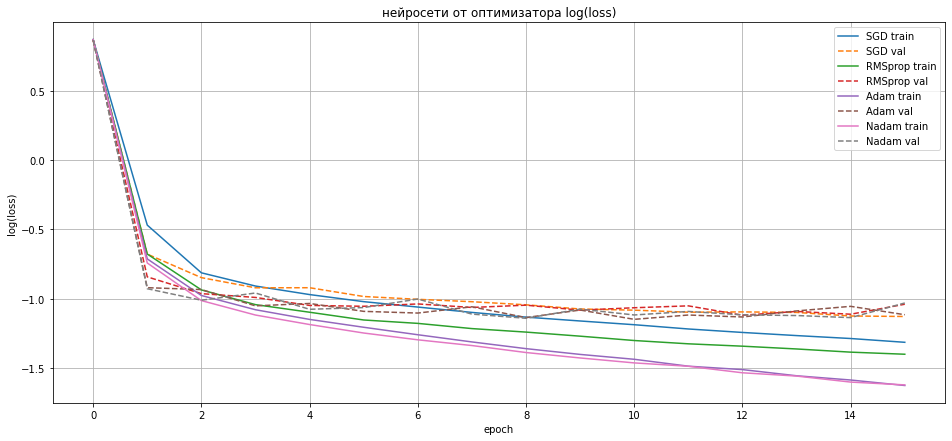

Model: "1st_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 110)               14190     
                                                                 
 dense_2 (Dense)             (None, 10)                1110      
                                                                 
Total params: 115,780
Trainable params: 115,780
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_config_1, model_summary_1, hyper_params_list_1, results_train_list_1, results_test_list_1, optim_list_1 = model_creation(train_images, train_labelf, test_images, test_labelf, model_name='1st_model')

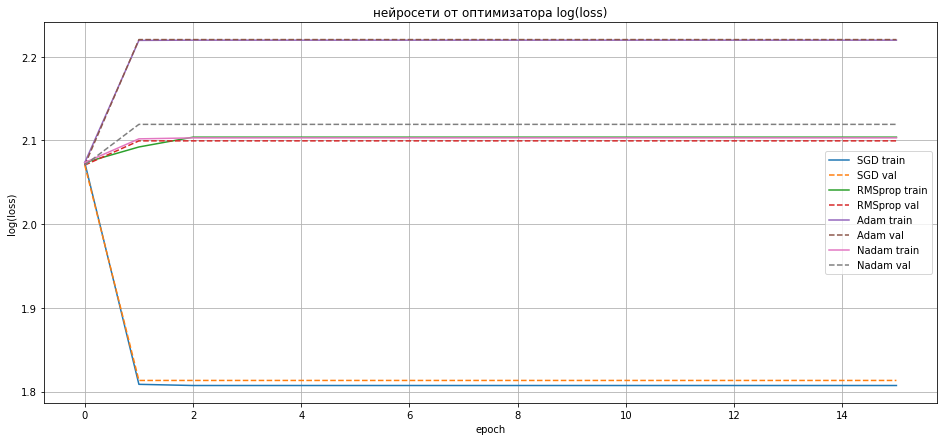

Model: "2nd_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               100480    
                                                                 
 dense_31 (Dense)            (None, 110)               14190     
                                                                 
 dense_32 (Dense)            (None, 10)                1110      
                                                                 
Total params: 115,780
Trainable params: 115,780
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_config_2, model_summary_2, hyper_params_list_2, results_train_list_2, results_test_list_2, optim_list_2 = model_creation(train_images, train_labelf, test_images, test_labelf, 2, 15, 128, ['SGD','RMSProp','adam','NAdam'], ['sigmoid', 'softplus', 'softsign'], '2nd_model', 'categorical_crossentropy', ['accuracy'])

In [13]:
# model_config_3, model_summary_3, hyper_params_list_3, results_train_list_3, results_test_list_3, optim_list_3 = model_creation(train_images, train_labelf, test_images, test_labelf, 2, 15, 128, ['SGD','RMSProp','Adam','NAdam', 'Adagrad'], ['relu', 'tanh', 'softmax'], '3d_model', 'categorical_crossentropy', 'accuracy')

In [14]:
# model_config_4, model_summary_4, hyper_params_list_4, results_train_list_4, results_test_list_4, optim_list_4 = model_creation(train_images, train_labelf, test_images, test_labelf, 8, 15, 128, ['SGD','RMSProp','Adam','NAdam', 'Adagrad'], ['relu', 'tanh', 'softmax'], '4th_model', 'categorical_crossentropy', 'accuracy')

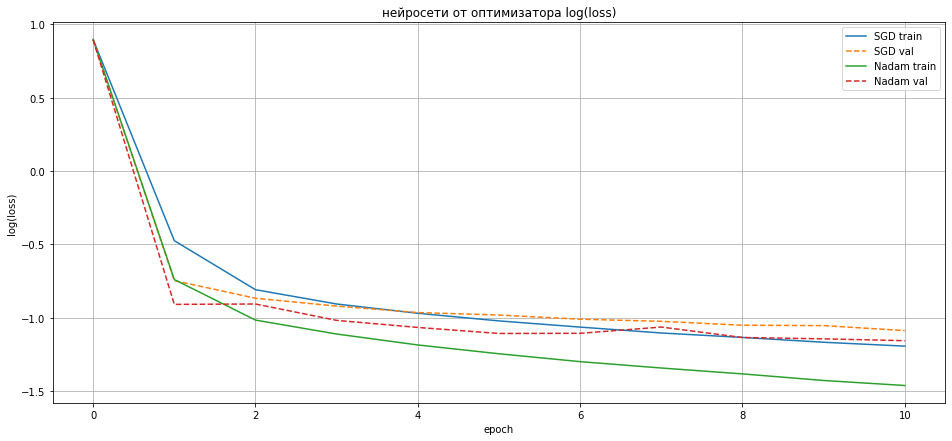

Model: "5th_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 128)               100480    
                                                                 
 dense_83 (Dense)            (None, 110)               14190     
                                                                 
 dense_84 (Dense)            (None, 10)                1110      
                                                                 
Total params: 115,780
Trainable params: 115,780
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_config_3, model_summary_3, hyper_params_list_3, results_train_list_3, results_test_list_3, optim_list_3 = model_creation(train_images, train_labelf, test_images, test_labelf, 2, 10, 64, ['SGD', 'NAdam'], ['relu', 'tanh', 'softmax'], '5th_model', 'categorical_crossentropy', 'accuracy')

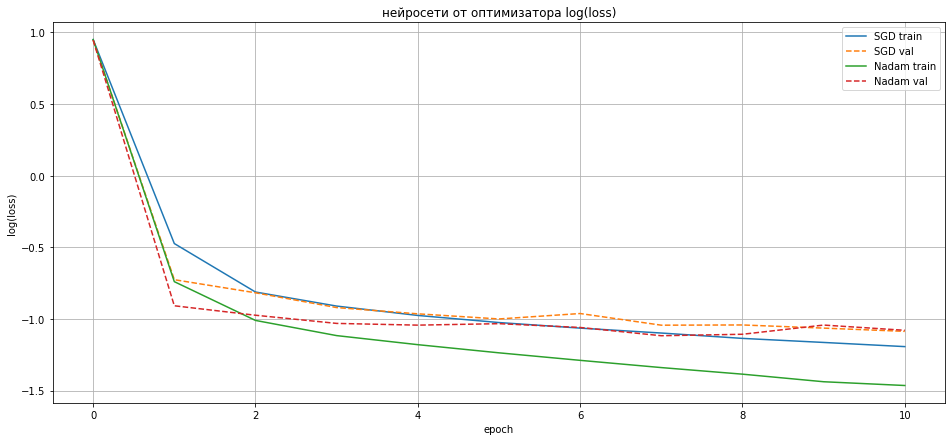

Model: "5th_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_91 (Dense)            (None, 128)               100480    
                                                                 
 dense_92 (Dense)            (None, 110)               14190     
                                                                 
 dense_93 (Dense)            (None, 10)                1110      
                                                                 
Total params: 115,780
Trainable params: 115,780
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_config_4, model_summary_4, hyper_params_list_4, results_train_list_4, results_test_list_4, optim_list_4 = model_creation(train_images, train_labelf, test_images, test_labelf, 2, 10, 216, ['SGD', 'NAdam'], ['relu', 'tanh', 'softmax'], '5th_model', 'categorical_crossentropy', 'accuracy')

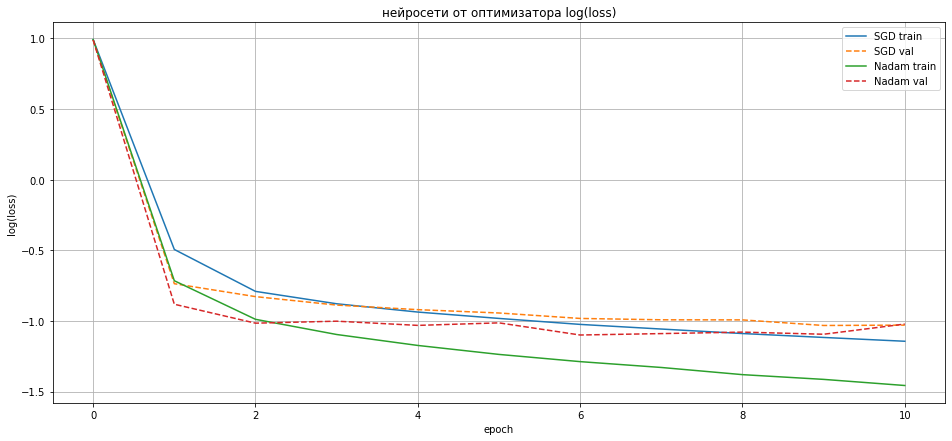

Model: "5th_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 128)               100480    
                                                                 
 dense_61 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_config_5, model_summary_5, hyper_params_list_5, results_train_list_5, results_test_list_5, optim_list_5 = model_creation(train_images, train_labelf, test_images, test_labelf, 1, 10, 128, ['SGD', 'NAdam'], ['relu', 'tanh', 'softmax'], '5th_model', 'categorical_crossentropy', 'accuracy')

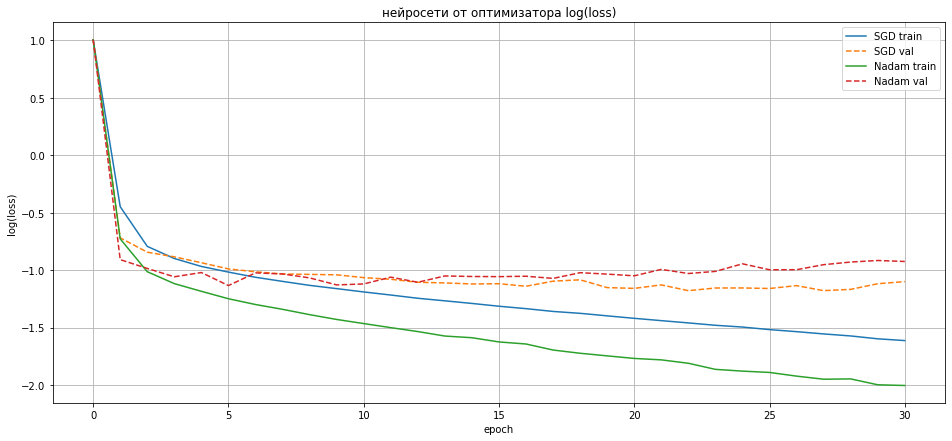

Model: "5th_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 128)               100480    
                                                                 
 dense_105 (Dense)           (None, 110)               14190     
                                                                 
 dense_106 (Dense)           (None, 10)                1110      
                                                                 
Total params: 115,780
Trainable params: 115,780
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_config_6, model_summary_6, hyper_params_list_6, results_train_list_6, results_test_list_6, optim_list_6 = model_creation(train_images, train_labelf, test_images, test_labelf, 2, 30, 128, ['SGD', 'NAdam'], ['relu', 'tanh', 'softmax'], '5th_model', 'categorical_crossentropy', 'accuracy')

In [24]:
def results_output(hyper_params_list, results_train_list, results_test_list, optim_list):
  print('Model parameters:')
  print('Layers number:', hyper_params_list[0])
  print('Epochs number:', hyper_params_list[1])
  print('Neurons number:', hyper_params_list[2])
  print('Activators names (for fist input layer, hidden layer(s), output layer):', hyper_params_list[3])
  print('Loss name:', hyper_params_list[4])
  print('Metric(s) name(s):', hyper_params_list[5])
  for i in range(len(results_test_list)):
    print('For optimizer', optim_list[i])
    print('Train loss, train accuracy:', results_train_list[i])
    print('Test loss, test accuracy:', results_test_list[i])

In [25]:
results_output(hyper_params_list_1, results_train_list_1, results_test_list_1, optim_list_1)

Model parameters:
Layers number: 2
Epochs number: 15
Neurons number: 128
Activators names (for fist input layer, hidden layer(s), output layer): ['relu', 'tanh', 'softmax']
Loss name: categorical_crossentropy
Metric(s) name(s): ['accuracy']
For optimizer SGD
Train loss, train accuracy: [2.382066011428833, 0.10054166615009308]
Test loss, test accuracy: [0.3506329655647278, 0.8769000172615051]
For optimizer RMSProp
Train loss, train accuracy: [2.382066011428833, 0.10054166615009308]
Test loss, test accuracy: [0.38074690103530884, 0.8755000233650208]
For optimizer adam
Train loss, train accuracy: [2.382066011428833, 0.10054166615009308]
Test loss, test accuracy: [0.34974205493927, 0.8817999958992004]
For optimizer NAdam
Train loss, train accuracy: [2.382066011428833, 0.10054166615009308]
Test loss, test accuracy: [0.37434330582618713, 0.8737000226974487]


In [26]:
results_output(hyper_params_list_2, results_train_list_2, results_test_list_2, optim_list_2)

Model parameters:
Layers number: 2
Epochs number: 15
Neurons number: 128
Activators names (for fist input layer, hidden layer(s), output layer): ['sigmoid', 'softplus', 'softsign']
Loss name: categorical_crossentropy
Metric(s) name(s): ['accuracy']
For optimizer SGD
Train loss, train accuracy: [7.953600883483887, 0.10106249898672104]
Test loss, test accuracy: [6.044288635253906, 0.10000000149011612]
For optimizer RMSProp
Train loss, train accuracy: [7.953600883483887, 0.10106249898672104]
Test loss, test accuracy: [8.173484802246094, 0.11270000040531158]
For optimizer adam
Train loss, train accuracy: [7.953600883483887, 0.10106249898672104]
Test loss, test accuracy: [9.214710235595703, 0.1111999973654747]
For optimizer NAdam
Train loss, train accuracy: [7.953600883483887, 0.10106249898672104]
Test loss, test accuracy: [8.152533531188965, 0.10000000149011612]


In [27]:
results_output(hyper_params_list_3, results_train_list_3, results_test_list_3, optim_list_3)

Model parameters:
Layers number: 2
Epochs number: 10
Neurons number: 64
Activators names (for fist input layer, hidden layer(s), output layer): ['relu', 'tanh', 'softmax']
Loss name: categorical_crossentropy
Metric(s) name(s): accuracy
For optimizer SGD
Train loss, train accuracy: [2.4496536254882812, 0.14085416495800018]
Test loss, test accuracy: [0.3671071529388428, 0.8671000003814697]
For optimizer NAdam
Train loss, train accuracy: [2.4496536254882812, 0.14085416495800018]
Test loss, test accuracy: [0.346697598695755, 0.8748999834060669]


In [28]:
results_output(hyper_params_list_4, results_train_list_4, results_test_list_4, optim_list_4)

Model parameters:
Layers number: 2
Epochs number: 10
Neurons number: 216
Activators names (for fist input layer, hidden layer(s), output layer): ['relu', 'tanh', 'softmax']
Loss name: categorical_crossentropy
Metric(s) name(s): accuracy
For optimizer SGD
Train loss, train accuracy: [2.5848207473754883, 0.06983333081007004]
Test loss, test accuracy: [0.3648667335510254, 0.8709999918937683]
For optimizer NAdam
Train loss, train accuracy: [2.5848207473754883, 0.06983333081007004]
Test loss, test accuracy: [0.36085113883018494, 0.8756999969482422]


In [29]:
results_output(hyper_params_list_5, results_train_list_5, results_test_list_5, optim_list_5)

Model parameters:
Layers number: 1
Epochs number: 10
Neurons number: 128
Activators names (for fist input layer, hidden layer(s), output layer): ['relu', 'tanh', 'softmax']
Loss name: categorical_crossentropy
Metric(s) name(s): accuracy
For optimizer SGD
Train loss, train accuracy: [2.6960182189941406, 0.07187499850988388]
Test loss, test accuracy: [0.3835391700267792, 0.8648999929428101]
For optimizer NAdam
Train loss, train accuracy: [2.6960182189941406, 0.07187499850988388]
Test loss, test accuracy: [0.38946467638015747, 0.8694000244140625]


In [30]:
results_output(hyper_params_list_6, results_train_list_6, results_test_list_6, optim_list_6)

Model parameters:
Layers number: 2
Epochs number: 30
Neurons number: 128
Activators names (for fist input layer, hidden layer(s), output layer): ['relu', 'tanh', 'softmax']
Loss name: categorical_crossentropy
Metric(s) name(s): accuracy
For optimizer SGD
Train loss, train accuracy: [2.7316250801086426, 0.053479164838790894]
Test loss, test accuracy: [0.36486491560935974, 0.8748000264167786]
For optimizer NAdam
Train loss, train accuracy: [2.7316250801086426, 0.053479164838790894]
Test loss, test accuracy: [0.41631880402565, 0.8797000050544739]


### Вывод
На работу моделей влияют все парметры, в том числе для разных оптимизаторов/активаторов "хорошие" значения для количества эпох/нейронов/слоёв разные.

Я очень неудачно подобрала изначально параметры, в связи с чем мне не хватило времени на более качественный подбор (очень долго строились модели).


In [ ]:
# создаем модель model
model = Sequential([
                      Dense( 64, activation='relu', input_shape=(784,)),
                      Dense(64, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы

#opt_list = [keras.optimizers.SGD( ),keras.optimizers.Adam( ),keras.optimizers.Nadam( )]
for i_optim in ['SGD']:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential([
                      Dense(64, activation='relu', input_shape=(784,)),
                      Dense(64, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=[tf.keras.metrics.Precision(class_id=0), tf.keras.metrics.Precision(class_id=1), tf.keras.metrics.Precision(class_id=2), tf.keras.metrics.Precision(class_id=3), tf.keras.metrics.Precision(class_id=4),
               tf.keras.metrics.Precision(class_id=5), tf.keras.metrics.Precision(class_id=6), tf.keras.metrics.Precision(class_id=7), tf.keras.metrics.Precision(class_id=8), tf.keras.metrics.Precision(class_id=9),
               tf.keras.metrics.Recall(class_id=0), tf.keras.metrics.Recall(class_id=1), tf.keras.metrics.Recall(class_id=2), tf.keras.metrics.Recall(class_id=3), tf.keras.metrics.Recall(class_id=4),
               tf.keras.metrics.Recall(class_id=5), tf.keras.metrics.Recall(class_id=6), tf.keras.metrics.Recall(class_id=7), tf.keras.metrics.Recall(class_id=8), tf.keras.metrics.Recall(class_id=9)],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(train_images[:48000,:], to_categorical(train_labelf[:48000]),verbose = 0)
  hh0_val = modeli.evaluate(train_images[48000:,:], to_categorical(train_labelf[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = modeli.fit(
                  train_images,
                  to_categorical(train_labelf),
                  epochs=epochs,
                  batch_size=32, validation_split=0.2, verbose = 0
                  )


In [ ]:
hh.history